<a href="https://colab.research.google.com/github/ML-ctrl/Thesis-ML_2022/blob/main/NLP_Salvini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import matplotlib.pyplot as plt

Import the data from Google Drive

In [ ]:
import gdown

# Download the file using gdown
url = 'https://drive.google.com/uc?id=1A8oJ5RcZMVEfbh7vCyrVRDWubkdGj_To'
output = 'Salvini_posts.xlsx'
gdown.download(url, output, quiet=False)

# Read the downloaded Excel file into a Pandas DataFrame
df = pd.read_excel(output, header=0, names=['id', 'text', 'url'])

# Display the first few rows of the DataFrame to understand what it looks like
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1A8oJ5RcZMVEfbh7vCyrVRDWubkdGj_To
To: /content/Salvini_posts.xlsx
100%|██████████| 35.9k/35.9k [00:00<00:00, 9.17MB/s]


                    id                                               text  \
0  3321651402860210567  Avete seguito su Rete4 con Nicola Porro?\nSull...   
1  3316541148883335922  ✅ Giornata storica oggi a Genova, dove sono pa...   
2  3315726828536783686  ♻️ Da guardare fino alla fine!\n\nOggi a Monto...   
3  3322177843209290932  Ennesima FOLLIA europea.\n\nGrazie all’impegno...   
4  3313332110817407931  Sempre dalla parte di chi, ogni giorno, rischi...   

                                        url  
0  https://www.instagram.com/p/C4Y4FofKSmH/  
1  https://www.instagram.com/p/C4GuJpmKDry/  
2  https://www.instagram.com/p/C4D0_urKuNG/  
3  https://www.instagram.com/p/C4avyWRKcS0/  
4  https://www.instagram.com/p/C37UgAAKrO7/  


In [ ]:
corpus = df['text'].tolist()
print(corpus)

['Avete seguito su Rete4 con Nicola Porro?\nSulla scandalo dossieraggio faremo esposti, come Lega, in tutte le procure italiane e andremo fino in fondo, se serve anche con la commissione d’inchiesta.\nSiamo il partito più infangato e spiato, ma io non mollo di un millimetro.', '✅ Giornata storica oggi a Genova, dove sono partiti i lavori del tunnel subportuale, una strada sottomarina lunga 3,4 chilometri (la più lunga d’Italia e la più grande d’Europa per diametro) che collegherà i due lati della città, togliendo traffico dalla superficie e portando rigenerazione urbana, parchi e aria pulita.\nUn’opera green intelligente di cui si è discusso per decenni e che oggi, finalmente, prende il via.', '♻️ Da guardare fino alla fine!\n\nOggi a Montorio al Vomano (Teramo) all’Ardagh, azienda che ogni giorno produce 1,5 MILIONI di bottiglie in vetro.\n\nUna realtà che porta lavoro, innovazione ma soprattutto sostenibilità, visto che ogni giorno utilizza 280 tonnellate di vetro smaltito dai cittad

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Since my data is in Italian, I will use the Italian stopwords provided by nltk, but I will also add my additional stopwords
stop_words = set(stopwords.words('italian'))
# Additional stop words
additional_stopwords = {"il", "f", "o", "si", "mettere", "portare", "così", "senza", "os", "da", "d", "fa", "oggi", "fatto", "essere", "solo", "cose"}

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def nltk_clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)

    # Tokenize and lemmatize, remove stop words and non-alphabetic tokens
    tokens = word_tokenize(str(text).lower())  # Lowercasing text and converting to string
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    # Explicitly filtering additional stopwords
    filtered_tokens = [token for token in filtered_tokens if token not in additional_stopwords]
    return ' '.join(filtered_tokens)

df['nltk_cleaned_text'] = df['text'].apply(nltk_clean_text)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,id,text,url,nltk_cleaned_text
0,3321651402860210567,Avete seguito su Rete4 con Nicola Porro?\nSull...,https://www.instagram.com/p/C4Y4FofKSmH/,seguito nicola porro scandalo dossieraggio esp...
1,3316541148883335922,"✅ Giornata storica oggi a Genova, dove sono pa...",https://www.instagram.com/p/C4GuJpmKDry/,giornata storica genova partiti lavori tunnel ...
2,3315726828536783686,♻️ Da guardare fino alla fine!\n\nOggi a Monto...,https://www.instagram.com/p/C4D0_urKuNG/,guardare fino fine montorio vomano teramo arda...
3,3322177843209290932,Ennesima FOLLIA europea.\n\nGrazie all’impegno...,https://www.instagram.com/p/C4avyWRKcS0/,ennesima follia europea grazie impegno lega gr...
4,3313332110817407931,"Sempre dalla parte di chi, ogni giorno, rischi...",https://www.instagram.com/p/C37UgAAKrO7/,sempre parte ogni giorno rischia propria vita ...


In [ ]:
#Word frequency
word_freq = df['nltk_cleaned_text'].apply(lambda x: x.split()).explode().value_counts()

print(word_freq)

nltk_cleaned_text
lega          35
anni          24
avanti        24
grazie        23
italia        19
              ..
discrimina     1
opprime        1
dovrebbe       1
racconto       1
venditori      1
Name: count, Length: 1936, dtype: int64


<ipython-input-6-44d2e070182a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')


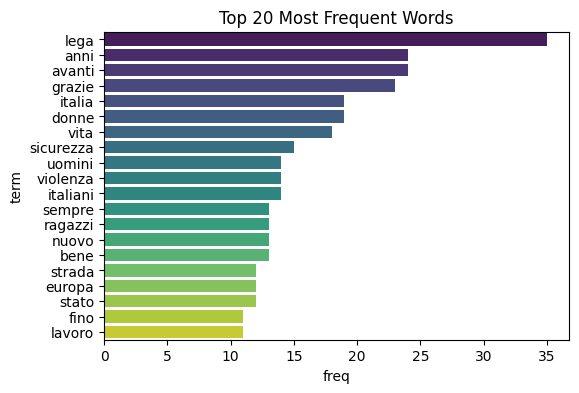

In [ ]:
# Converting the Series to a DataFrame
word_freq_df = word_freq.to_frame().reset_index()
word_freq_df.columns = ['term','freq']
word_freq_df.head()

import seaborn as sns
import matplotlib.pyplot as plt

top_n = 20
plt.figure(figsize=(6, 4))
sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')

plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('freq')
plt.ylabel('term')

plt.show()

In [ ]:
data = df.text.values.tolist()

if False:
    df['nltk_clean_data'] = df['text'].str.replace("&#039;", "'", regex=False)
    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', str(sent)) for sent in data]
    # Remove new line characters
    data = [re.sub(r'\s+', ' ', str(sent)) for sent in data]
    # Remove distracting single quotes
    data = [re.sub(r"\'", "", str(sent)) for sent in data]

In [ ]:
import spacy
!python -m spacy download it_core_news_sm
nlp = spacy.load('it_core_news_sm')

def lemmatization(data):
    texts_out = []
    for text in data:
        # Check if the text is not NaN (float) and is a string
        if isinstance(text, str):
            doc = nlp(text)
            lemmatized_text = " ".join([token.lemma_ for token in doc])
            texts_out.append(lemmatized_text)
    return texts_out

lemmatized_texts = lemmatization(data)

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


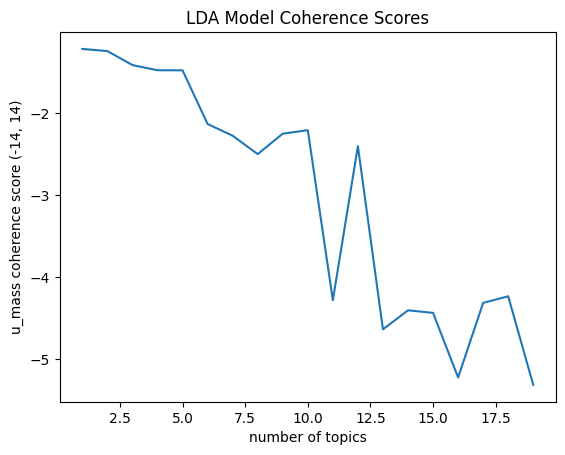

In [ ]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=50)
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
  topics.append(i)
  score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('number of topics')
plt.ylabel('u_mass coherence score (-14, 14)')
plt.title('LDA Model Coherence Scores')
plt.show()

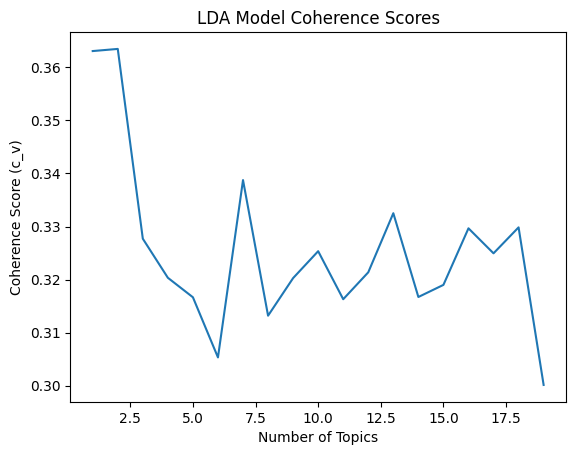

In [ ]:
topics = []
score = []

for i in range(1, 20, 1):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=50)
    cm = CoherenceModel(model=lda_model, texts=data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.title('LDA Model Coherence Scores')
plt.show()

<p align="justify">
When it comes to choosing the best coherence score, one solution is to implement the elbow technique. Usually, the coherence score will increase with the increase in the number of topics. This increase will become smaller as the number of topics gets higher. The trade-off between the number of topics and coherence score can be achieved using the elbow technique. Following Khalid and Wade (2020) "the elbow method helps the interpretation and validation of consistency within-cluster analysis and select the optimal number of clusters by fititng the model with a range of values of K".
In other words, applied to my case it consists in the idea that one should choose a number of topic so that adding another topic doesn't give much better coherence score.
Usign this technique I individuated the same number of topic with both u_mass and c_v topic coherences: 4.

In [ ]:
import gensim
from gensim import corpora

# Tokenize the text
tokenized_text = df['nltk_cleaned_text'].apply(lambda x: x.split())

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(tokenized_text)

# Create a corpus (bag of words) from the tokenized text
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Define the number of topics
num_topics = 4

# Train the LDA model using the tokenized and bag-of-words formatted corpus
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10, passes=10, random_state=100)

# Print topics
for topic in lda_model.print_topics():
    print(topic)


(0, '0.011*"avanti" + 0.006*"lega" + 0.006*"grazie" + 0.004*"genitori" + 0.004*"proposta" + 0.004*"ragazzi" + 0.004*"nuovo" + 0.004*"vita" + 0.004*"anni" + 0.004*"dopo"')
(1, '0.007*"lega" + 0.007*"strada" + 0.005*"grande" + 0.005*"codice" + 0.004*"nuovo" + 0.004*"sempre" + 0.004*"anni" + 0.004*"italia" + 0.004*"sinistra" + 0.003*"grazie"')
(2, '0.008*"bene" + 0.007*"lega" + 0.006*"anni" + 0.006*"donne" + 0.005*"italia" + 0.005*"vita" + 0.005*"grazie" + 0.005*"può" + 0.005*"nessuno" + 0.004*"uomini"')
(3, '0.007*"lega" + 0.007*"sicurezza" + 0.006*"no" + 0.006*"fino" + 0.004*"donne" + 0.004*"viva" + 0.004*"anni" + 0.004*"difesa" + 0.004*"matteo" + 0.004*"tocca"')


In [ ]:
# topic modeling plotting tools
!pip install -q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 29.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
# Visualize the topics
#pyLDAvis.enable_notebook()
!pip install pandas==2.0.0 #To visualize the topics it is necessary to disinstall pandas 2.1.4 and instead install pandas 2.0.0

# Prepare the visualization
vis_data = pyLDAvis.gensim.prepare(lda_model,corpus, dictionary=lda_model.id2word)

# Display the visualization
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


SENTIMENT ANALYSIS

FIRST MODEL

For my first model I tried using  HuggingFace 'MilaNLProc/feel-it-italian-sentiment' ( https://huggingface.co/MilaNLProc/feel-it-italian-sentiment). According to the HuggingFace documentation it should have an accuracy of 84%. However, just to be sure I tested it with a dataset of positive and negative reviews written in in Italian, which presented a positive-negative rating and therefore was comparable to what I was aiming to achieve in my own project, and it only showed to be 52% accurate.

In [ ]:
!pip install -q transformers
!gdown https://drive.google.com/uc?id=10Z0dmx_3Ruq1FxVyMsB76NPHEApL-u3Z

fp = "sentiment.xlsx"
test_df = pd.read_excel(fp, header=None, names=['id','text', "sentiment"])
test_df.head()
print(test_df)
from transformers import pipeline

classifier = pipeline("text-classification",model='MilaNLProc/feel-it-italian-sentiment',top_k=2)
prediction = classifier("Oggi sono proprio contento!")
print(prediction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=10Z0dmx_3Ruq1FxVyMsB76NPHEApL-u3Z
To: /content/sentiment.xlsx
100% 55.7k/55.7k [00:00<00:00, 6.46MB/s]
    id                                               text  sentiment
0    0  Questo è stato un interessante e piena di sera...          1
1    1  Ottimo e ben organizzato. Nessuna coda all'ent...          1
2    3  Sconsiglio di visitarlo, è sopravvalutato e tr...          0
3    4  La vista del duomo all'uscita della metro non ...          0
4    5  Vivo a Milano da una vita ma non avevo mai tro...          1
5    6  Tenuto abbastanza bene, ma difficilmente acces...          0
6    8  Non ci sono parole per descrivere la bellezza ...          1
7    9  Un polmone verde in una grande città, uno dei ...          1
8   10  Visitare Milano nel periodo di Natale e' molto...          0
9   11  Bruttissimo in questa stagione , abbiamo girat...          0
10  12  E' una delle attrazioni più importanti da vede...          1
11  13  Quando si

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/794k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/299 [00:00<?, ?B/s]

[[{'label': 'positive', 'score': 0.9997411370277405}, {'label': 'negative', 'score': 0.00025880170869641006}]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


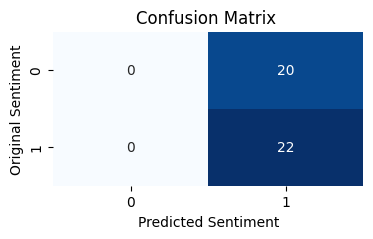

In [ ]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix

# sentiment analysis model
model_name = "MilaNLProc/feel-it-italian-sentiment"

# sentiment analysis pipeline
nlp = pipeline("text-classification", model=model_name)

# predict sentiment on the original unaltered texts
test_df['HuggingFace Prediction'] = test_df['text'].apply(lambda text: nlp(text)[0])

# predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
test_df['HuggingFace Confidence'] = test_df['HuggingFace Prediction'].apply(lambda prediction: prediction['score'])
test_df['HuggingFace Prediction'] = test_df['HuggingFace Prediction'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)

# confusion matrix
conf_matrix = confusion_matrix(test_df['sentiment'], test_df['HuggingFace Prediction'])

# plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Original Sentiment")
plt.title("Confusion Matrix ")
plt.show()

Accuracy: 52%, which is not good. This model only shows an accuracy of 52%, which I deemed too low, therefore in the end I decided to not use it and instead to try another model.

SECOND MODEL
For my second model I chose "bert tweet italian uncased sentiment" (https://huggingface.co/osiria/bert-tweet-italian-uncased-sentiment), a HugginFace model that according to the documentation has a precision of 80%. The model is trained to perform binary sentiment classification (positive vs negative) and it's meant to be used primarily on tweets or other social media posts.
Again, I decided to try it with the TripAdvisor dataset.

In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification, pipeline

tokenizer = BertTokenizerFast.from_pretrained("osiria/bert-tweet-italian-uncased-sentiment")
model = BertForSequenceClassification.from_pretrained("osiria/bert-tweet-italian-uncased-sentiment")
classifier = pipeline("text-classification", model = model, tokenizer = tokenizer)

classifier("una fantastica giornata di #calcio! grande prestazione del mister e della squadra")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tokenizer_config.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/206k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9883694648742676}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


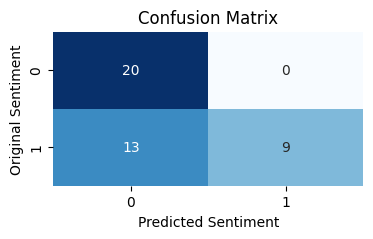

In [ ]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix

# sentiment analysis model
model_name = "osiria/bert-tweet-italian-uncased-sentiment"

# sentiment analysis pipeline with model
nlp = pipeline("text-classification", model=model_name)

# predict sentiment on the original unaltered texts
test_df['HuggingFace Prediction'] = test_df['text'].apply(lambda text: nlp(text)[0])

# extract the predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
test_df['HuggingFace Confidence'] = test_df['HuggingFace Prediction'].apply(lambda prediction: prediction['score'])
test_df['HuggingFace Prediction'] = test_df['HuggingFace Prediction'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)

# confusion matrix
conf_matrix = confusion_matrix(test_df['sentiment'], test_df['HuggingFace Prediction'])

# plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Original Sentiment")
plt.title("Confusion Matrix")
plt.show()

Accuracy of 69%, much better compared to the previous one. It is not an extremely high accuracy score, however taken into account that there are not a lot of models for sentiment analysis on Italian datasets, I am satisfied with an accuracy of almost 70%.

In [ ]:
# Use the pipeline to predict sentiment on my own dataset
df['hf_nlp'] = df['nltk_cleaned_text'].apply(lambda text: nlp(text)[0])

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,text,url,nltk_cleaned_text,hf_nlp
0,3321651402860210567,Avete seguito su Rete4 con Nicola Porro?\nSull...,https://www.instagram.com/p/C4Y4FofKSmH/,seguito nicola porro scandalo dossieraggio esp...,"{'label': 'NEGATIVE', 'score': 0.998742401599884}"
1,3316541148883335922,"✅ Giornata storica oggi a Genova, dove sono pa...",https://www.instagram.com/p/C4GuJpmKDry/,giornata storica genova partiti lavori tunnel ...,"{'label': 'NEGATIVE', 'score': 0.7072104811668..."
2,3315726828536783686,♻️ Da guardare fino alla fine!\n\nOggi a Monto...,https://www.instagram.com/p/C4D0_urKuNG/,guardare fino fine montorio vomano teramo arda...,"{'label': 'POSITIVE', 'score': 0.5910964012145..."
3,3322177843209290932,Ennesima FOLLIA europea.\n\nGrazie all’impegno...,https://www.instagram.com/p/C4avyWRKcS0/,ennesima follia europea grazie impegno lega gr...,"{'label': 'NEGATIVE', 'score': 0.9956437349319..."
4,3313332110817407931,"Sempre dalla parte di chi, ogni giorno, rischi...",https://www.instagram.com/p/C37UgAAKrO7/,sempre parte ogni giorno rischia propria vita ...,"{'label': 'NEGATIVE', 'score': 0.993627667427063}"


In [ ]:
# Extract the predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
df['hf_prediction'] = df['hf_nlp'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)
df['hf_confidence'] = df['hf_nlp'].apply(lambda prediction: prediction['score'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Get the mean of the prediction
df.hf_prediction.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.37333333333333335

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-b447d46a26d6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dt

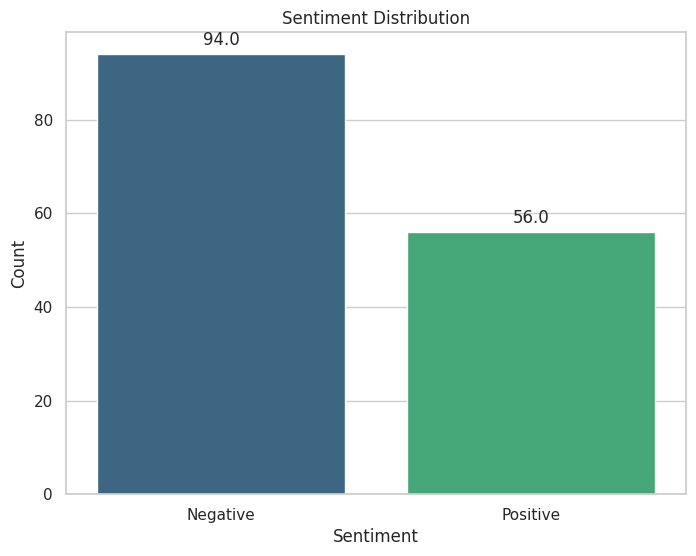

In [ ]:
#Visualization of te sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['hf_prediction'].value_counts()

# Map numerical values to string labels
sentiment_mapping = {0: 'Negative', 1: 'Positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_mapping)

# Plot the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Set labels and title
ax.set(xlabel='Sentiment', ylabel='Count', title='Sentiment Distribution')

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Below there is the Chi-squared test of the difference in the distribuitons of sentiments between the Calenda and Salvini.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Observed frequencies
observed = np.array([[164, 36], [94, 56]])

# Calculate chi-square statistic and p-value
chi2_stat, p_val, _, _ = chi2_contingency(observed)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Set significance level
alpha = 0.05

# Compare p-value with significance level
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in the distribution of sentiment.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distribution of sentiment.")


Chi-square statistic: 15.55193061172902
p-value: 8.026963591830578e-05
Reject the null hypothesis. There is a significant difference in the distribution of sentiment.
